# Naive Bayes

Bayes' theorem:

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

where A and B are events, and P(B) is the probability of event B.

$P(B|A)P(A) = P(A \cap B) = P(A|B)P(B)$

In the context of Naive Bayes, we have a set of n features x = (x_1, ..., x_n) and a set of classes C_k, where k is an index over the possible classes.

We can use Bayes' theorem to calculate the probability of a particular class C_k given the features x:

$P(C_k | x) = \frac{P(C_k)P(x|C_k)}{P(x)}$

Here, P(C_k) is the prior probability of class C_k, P(x|C_k) is the likelihood of observing the features x given class C_k, and P(x) is the marginal probability of observing the features x.

The Naive Bayes algorithm makes the strong assumption that the features are conditionally independent given the class.

$P(C_k|x) = P(C_k|n_1, \ldots, x_n) \propto P(C_k, x_1, \ldots, x_n)$

($\propto$ denotes proportionality)

The normalizing constant is proportional to:


$P(C_k|x) \propto P(C_k) P(x_1|C_k) \ldots P(x_n|C_k)$

WHAT

meaning that:

$P(C_k) = \prod_{i=1}^n P(x_i | C_k)$

Combined with MAP descision rule:

\begin{equation}
y = \arg\max_{k \in 1,...K} P(C_k) \prod_{i=1}^n P(x_i | C_k)
\end{equation}


But let's get practical.

## Ham or Spam

20 HAM : $C_1$ $P(C_1)$ = 20/30 = 2/3 \
10 SPAM: $C_2$ $P(C_2)$ = 10/30 = 1/3

<div style="display: flex; flex direction: row">
<div style="flex: 2; padding:10px; margin:10px;">

$C_1$ Hams
bitcoin | hello | love
 ------ | ----- | -----
1|20|4
1/25|20/25|4/25

$P(X_i|C_1)$
</div>
<div style="flex: 2; padding:10px; margin:10px;">

$C_2$ Spams
bitcoin | hello | love
 ------ | ----- | -----
8|2|10
8/20|22/20|10/20

$P(X_i|C_2)$
</div></div>
Nytt mail: <i>"love bitcoin"</i>

P(ham) P(love|ham) P(bitcoin|ham) =\
2/3 * 4/25 * 1/25 = 8 / 1875 = 0.004

P(spam) P(love|spam) P(bitcoin|spam) =\
1/3 * 1/2 * 4/5 = 4/30 = 2/15 = 0.133

Classified as spam


In [20]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

df = pd.read_csv("../Data/spam.csv", encoding="latin-1")
df.sample(frac=0.2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2661,ham,Do you know when dad will be back?,NaN,NaN,NaN
2789,ham,When you are big..| God will bring success.,NaN,NaN,NaN
2444,ham,"Yes but i dont care! I need you bad, princess!",NaN,NaN,NaN
4828,ham,"How long before you get reply, just defer admi...",NaN,NaN,NaN
3438,ham,"awesome, how do I deal with the gate? Charles ...",NaN,NaN,NaN
...,...,...,...,...,...
736,ham,Thanks for looking out for me. I really apprec...,NaN,NaN,NaN
625,ham,"Haha good to hear, I'm officially paid and on ...",NaN,NaN,NaN
5384,ham,How are you babes. Hope your doing ok. I had a...,NaN,NaN,NaN
5219,ham,Pls she needs to dat slowly or she will vomit ...,NaN,NaN,NaN


In [21]:
df = df.dropna(axis=1)

In [22]:
df.sample(frac=0.2)

,v1,v2
4730,ham,K:)eng rocking in ashes:)
4668,ham,"When I was born, GOD said, \Oh No! Another IDI..."
255,ham,Don't necessarily expect it to be done before ...
3894,ham,Yes. Last practice
137,ham,No no. I will check all rooms befor activities
...,...,...
3630,ham,Thank you princess! You are so sexy...
2305,ham,Still in the area of the restaurant. Ill try t...
2658,ham,Not yet chikku..wat abt u?
4359,ham,"Night sweet, sleep well! I've just been to see..."


<Axes: xlabel='v1', ylabel='count'>

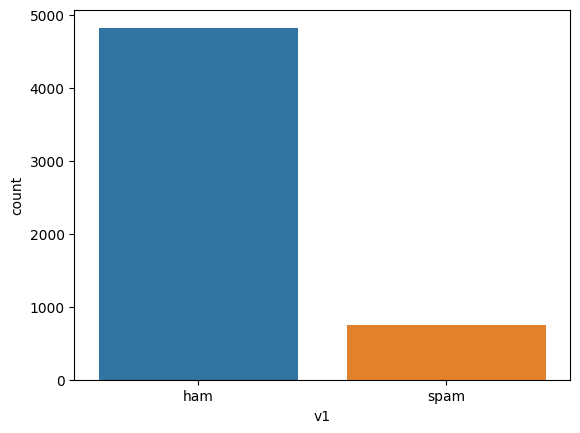

In [23]:
sns.countplot(data = df, x = "v1")

In [24]:
# Not very balanced dataset. Much ham.

# Need to make dummies on ham/spam

df = pd.get_dummies(df, columns=['v1'], drop_first=True)

In [25]:
df.sample(frac=0.2)

,v2,v1_spam
4460,Thanks again for your reply today. When is ur ...,0
4001,Did you get any gift? This year i didnt get an...,0
4339,I want to sent &lt;#&gt; mesages today. Thats...,0
5008,My mobile number.pls sms ur mail id.convey reg...,0
399,Hmmm...k...but i want to change the field quic...,0
...,...,...
1518,Shall i ask one thing if you dont mistake me.,0
2797,Purity of friendship between two is not about ...,0
2034,Is avatar supposed to have subtoitles,0
3819,"I got arrested for possession at, I shit you n...",0


In [26]:
X, y = df['v2'], df['v1_spam']

In [27]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: v1_spam, dtype: uint8

# TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(stop_words="english")
print(tfidf_vectorizer.get_stop_words())

frozenset({'toward', 'sincere', 'how', 'detail', 'show', 'same', 'fill', 'bill', 'becoming', 'cannot', 'first', 'thereupon', 'via', 'cant', 'had', 'now', 'below', 'ever', 'should', 'are', 'whose', 'though', 'together', 'done', 'be', 'never', 'but', 'whereby', 'everyone', 'as', 'have', 'can', 'whenever', 'amongst', 'he', 'another', 'please', 'much', 'between', 'off', 'afterwards', 'if', 'sixty', 'him', 'bottom', 'back', 'besides', 'other', 'beforehand', 'whereas', 'moreover', 'sometime', 'would', 'meanwhile', 'under', 'was', 'further', 'whither', 'less', 'all', 'around', 'at', 'nothing', 'this', 'well', 'every', 'which', 'beyond', 'upon', 'more', 'nine', 'thick', 'will', 'inc', 'former', 'not', 'me', 'anyone', 'ourselves', 'amoungst', 'is', 'out', 'several', 'yours', 'side', 'since', 'indeed', 'she', 'cry', 'over', 'amount', 'five', 'call', 'least', 'anyway', 'fifteen', 'somewhere', 'some', 'someone', 'take', 'un', 'on', 'thereby', 'thereafter', 'the', 'yourselves', 'even', 'else', 'oth

**stop_words{‘english’}, list, default=None**\
If a string, it is passed to _check_stop_list and the appropriate stop list is returned. ‘english’ is currently the only supported string value. There are several known issues with ‘english’ and you should consider an alternative (see Using stop words). <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html">documentation</a>

In [29]:
X_tfidf = tfidf_vectorizer.fit_transform(X)
X_tfidf

<5572x8442 sparse matrix of type '<class 'numpy.float64'>'
	with 43742 stored elements in Compressed Sparse Row format>

In [30]:
X_tfidf.mean(), X_tfidf.min(), X_tfidf.max()

(0.000302292128255357, 0.0, 1.0)

Now we represent X (text) with with numbers through a sparse matrix. Each individual element can have a value between 0 and 1.
1 has high importance, given that it does not occur much in **all** documents in the corpus (stop words). 0 is less important.

After applying the TfidfVectorizer to the text data X, we can create a new DataFrame tfidf_df that contains the transformed text features and their corresponding feature names:

In [37]:
feature_names = tfidf_vectorizer.vocabulary_        # Get the feature names from the TfidfVectorizer object
dense = X_tfidf.todense()                           # Convert the sparse matrix to a dense matrix

# Convert the dense matrix to a list
denselist = dense.tolist()

tfidf_df = pd.DataFrame(denselist, columns=feature_names.keys())

In [51]:
top_important_words = tfidf_df[tfidf_df == 1].stack().reset_index()[['level_1']]

In [62]:
len(top_important_words)

186

In [63]:
top_important_words.head(30)

,level_1
0,saves
1,anythingtomorrow
2,checkin
3,fantasies
4,cast
5,087018728737
6,positive
7,problms
8,cooking
9,reltnship


Yeah idk about importance, but some of them are good. Anyway.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=.33, random_state=42)
X_train.shape, X_test.shape

((3733, 8442), (1839, 8442))

<Axes: xlabel='v1_spam', ylabel='count'>

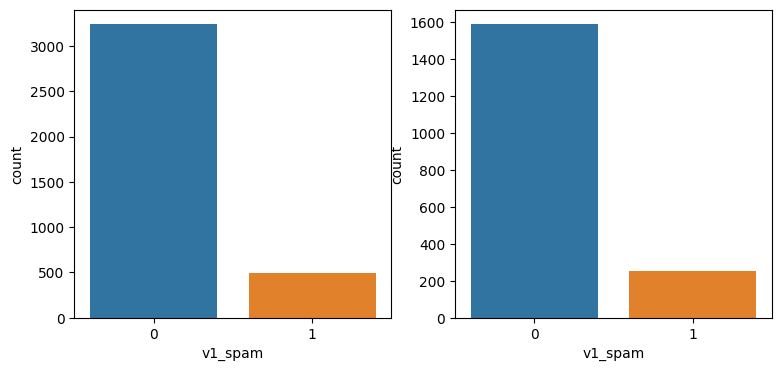

In [76]:
# Check distribution

fig, ax = plt.subplots(1,2, figsize=(9,4))
sns.countplot(x=y_train, ax = ax[0])
sns.countplot(x=y_test, ax = ax[1])

# MultinomialNB, BernoulliNB, ComplementNB

In [77]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [102]:
naive_bayes = dict(
    multinomial=MultinomialNB(), bernoulli=BernoulliNB(), complement=ComplementNB()
)

import matplotlib.pyplot as plt

def evaluate_model(model, figsize=[2,2]):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=figsize)
    ConfusionMatrixDisplay(cm, display_labels=['Ham','Spam']).plot(ax=ax)
    plt.show()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1587
           1       1.00      0.74      0.85       252

    accuracy                           0.96      1839
   macro avg       0.98      0.87      0.92      1839
weighted avg       0.97      0.96      0.96      1839



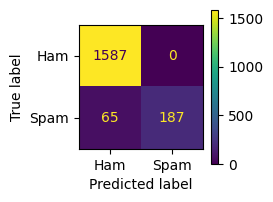

In [103]:
evaluate_model(naive_bayes['multinomial'])

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1587
           1       0.98      0.82      0.89       252

    accuracy                           0.97      1839
   macro avg       0.97      0.91      0.94      1839
weighted avg       0.97      0.97      0.97      1839



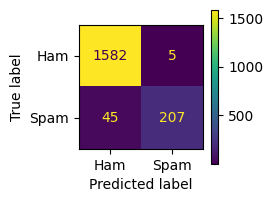

In [97]:
evaluate_model(naive_bayes['bernoulli'])

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1587
           1       0.67      0.95      0.78       252

    accuracy                           0.93      1839
   macro avg       0.83      0.94      0.87      1839
weighted avg       0.95      0.93      0.93      1839



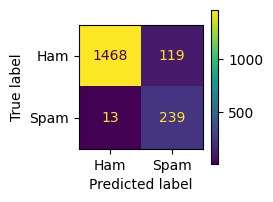

In [98]:
evaluate_model(naive_bayes['complement'])

## LinearSVC

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       0.97      0.86      0.91       252

    accuracy                           0.98      1839
   macro avg       0.98      0.93      0.95      1839
weighted avg       0.98      0.98      0.98      1839



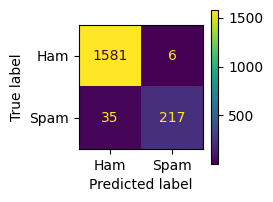

In [99]:
from sklearn.svm import LinearSVC

evaluate_model(LinearSVC())

## RandomForestClassifier

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1587
           1       1.00      0.83      0.91       252

    accuracy                           0.98      1839
   macro avg       0.99      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



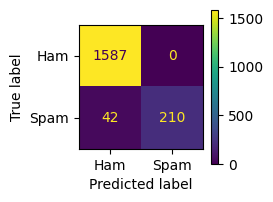

In [100]:
from sklearn.ensemble import RandomForestClassifier

evaluate_model(RandomForestClassifier())

# Combine different models

- Majority vote
- Hard voting (Class with most votes wins)
- Soft voting (Class with highest probability wins)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       1.00      0.86      0.93       252

    accuracy                           0.98      1839
   macro avg       0.99      0.93      0.96      1839
weighted avg       0.98      0.98      0.98      1839



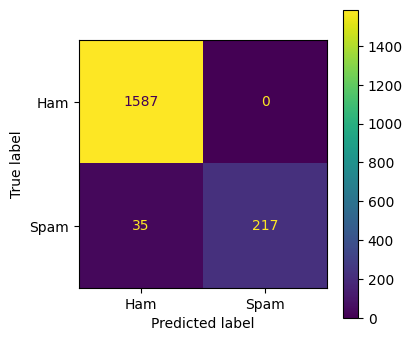

In [104]:
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier([
    ("random_forest", RandomForestClassifier()),
    ("svc", LinearSVC()),
    ("naive_complement", ComplementNB()),
    ("naive_multinomial", MultinomialNB()),
    ("naive_bernouilli", BernoulliNB())
], voting = "hard")

evaluate_model(vote_clf, figsize=[4,4])

## "Deployment" Model testing

- Assume we choose vote_clf

In [112]:
from sklearn.pipeline import Pipeline
# Pipeline to chain multiple steps together to run in sequence.
pipe = Pipeline([("tfidf", TfidfVectorizer(stop_words="english")), ("vote", vote_clf)])


# Fit on all data
pipe.fit(X,y)
pipe.predict(["Collect your free bitcoin now!"])

array([0], dtype=uint8)

In [114]:
pipe.predict(["win free bitcoin"])

array([1], dtype=uint8)